# FrontMatter Analysis

In [0]:
import pandas as pd

In [0]:
# read dataset
x_all = pd.read_csv("../data/java_training_data.csv",sep=" ")

In [0]:
x_all.head()

,volume,seq,log_seq,squared_seq,pct_seq,token_count,token_count_normalized,line_count,empty_line_count,empty_line_count_normalized,cap_alpha_seq,pct_begin_char_caps,pct_end_char_numeric,num_roman_numerals,pct_all_caps,target
0,aeu.ark+=13960=t9d51x63d,1.0,0.000000,1.0,0.023810,67.0,-0.599705,69.0,36.0,1.175258,4.0,0.272727,0.121212,0.0,0.567164,open
1,aeu.ark+=13960=t9d51x63d,2.0,0.693147,4.0,0.047619,24.0,-0.895092,14.0,5.0,-0.755819,3.0,0.444444,0.000000,0.0,0.208333,open
2,aeu.ark+=13960=t9d51x63d,3.0,1.098612,9.0,0.071429,437.0,1.941999,140.0,54.0,2.296528,4.0,0.162791,0.011628,6.0,0.070938,open
3,aeu.ark+=13960=t9d51x63d,4.0,1.386294,16.0,0.095238,423.0,1.845826,79.0,15.0,-0.132891,3.0,0.093750,0.031250,0.0,0.047281,open
4,aeu.ark+=13960=t9d51x63d,5.0,1.609438,25.0,0.119048,6.0,-1.018742,4.0,2.0,-0.942698,1.0,0.500000,0.000000,0.0,0.833333,open


In [0]:
import sklearn

In [0]:
target_classes = x_all.target.unique().tolist()

In [0]:
x_all["target_class"] = x_all.target.apply(lambda x: target_classes.index(x))

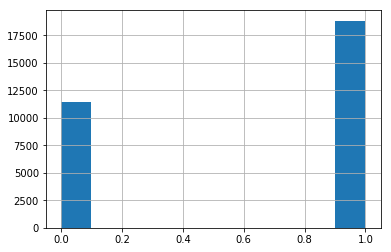

In [0]:
x_all.target_class.hist()

In [0]:
X = x_all.iloc[:,1:-2]
y = x_all.iloc[:,-1]

In [0]:
# split training and testing
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
# Import metrics for computing accuracy
from sklearn import metrics

## LDA

In [0]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)  

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [0]:
y_hat = clf_lda.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2289
           1       0.89      0.94      0.91      3765

    accuracy                           0.89      6054
   macro avg       0.89      0.87      0.88      6054
weighted avg       0.89      0.89      0.89      6054



## SVM

In [0]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_hat = clf_svm.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      2289
           1       0.83      0.98      0.90      3765

    accuracy                           0.87      6054
   macro avg       0.89      0.83      0.85      6054
weighted avg       0.88      0.87      0.86      6054



## SVC, with linear kernel

In [0]:
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(random_state=0, tol=1e-6,max_iter=10000)
clf_svm_linear.fit(X_train, y_train)  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-06,
          verbose=0)

In [0]:
y_hat = clf_svm_linear.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2289
           1       0.90      0.90      0.90      3765

    accuracy                           0.88      6054
   macro avg       0.87      0.87      0.87      6054
weighted avg       0.88      0.88      0.88      6054



## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5,
                              random_state=0)
clf_rf.fit(X_train, y_train)  
print(clf_rf.feature_importances_)

[0.07738465 0.13968316 0.11187421 0.05109282 0.15979522 0.18530949
 0.06567441 0.01310281 0.01269114 0.0124439  0.03978442 0.05333825
 0.0029473  0.07487823]


In [0]:
y_hat = clf_rf.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2289
           1       0.94      0.96      0.95      3765

    accuracy                           0.93      6054
   macro avg       0.93      0.93      0.93      6054
weighted avg       0.93      0.93      0.93      6054



## Stochastic Gradient Descent

In [0]:
from sklearn import linear_model
clf_sgd = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf_sgd.fit(X_train, y_train)  


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_hat = clf_sgd.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2289
           1       0.86      0.95      0.90      3765

    accuracy                           0.87      6054
   macro avg       0.88      0.85      0.86      6054
weighted avg       0.88      0.87      0.87      6054



# New approach using extracted features (EF)

## Download the EF volume on the testing set using EF_HTRC python library

In [0]:
!pip install htrc-feature-reader

     |████████████████████████████████| 194kB 15.3MB/s 
     |████████████████████████████████| 215kB 49.0MB/s 
  Created wheel for htrc-feature-reader: filename=htrc_feature_reader-1.99-cp36-none-any.whl size=13605 sha256=5972f82670a5b299bdcfcdfd015179f0cdac50b90e1c03c3fb3fb6e74bd55cb0
  Stored in directory: /root/.cache/pip/wheels/4f/18/43/63eb2e1e2e0a169866c024e84c44cdd23ad0507d27c3c6b2e9
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68041 sha256=dce7b2a667063fca51c3e6a50f724cf26e875c145d27f83ada91620a0893420a
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Created wheel for pymarc: filename=pymarc-3.1.13-cp36-none-any.whl size=145759 sha256=58a6027e8541270e0bda036dcae1df721d0eb10f1ee46504156a26eb7d3cc515
  Stored in directory: /root/.cache/pip/wheels/94/ab/33/6cc81cb18d16cc4704c9fd6e11636cae7f99660cb4a7361e62
Successfully built htrc-feature-reader ujson pymarc


In [0]:
import urllib.parse

urllib.parse.quote("aeu.ark+=13960=t9d51x63d")

'aeu.ark%2B%3D13960%3Dt9d51x63d'

In [0]:
vol_ids = [urllib.parse.quote(x) for x in x_all.volume.unique()]

In [0]:
from htrc_features import FeatureReader
#ef_list = []
#for vol_id in x_all.volume.unique():
fr = FeatureReader(ids=vol_ids)


In [0]:
#ef_list = list(fr)

In [0]:
!pip install jsonpickle

In [0]:
import jsonpickle

## Save the EF in a json file

In [0]:
"""
with open("ef-vols.json","w") as file:
  for vol in fr:
    print(vol.id)
    file.write(jsonpickle.dumps(vol)+"\n")
"""

'\nwith open("ef-vols.json","w") as file:\n  for vol in fr:\n    print(vol.id)\n    file.write(jsonpickle.dumps(vol)+"\n")\n'

## Read EF Json File

In [0]:
x_all.head()

,volume,seq,log_seq,squared_seq,pct_seq,token_count,token_count_normalized,line_count,empty_line_count,empty_line_count_normalized,cap_alpha_seq,pct_begin_char_caps,pct_end_char_numeric,num_roman_numerals,pct_all_caps,target,target_class
0,aeu.ark+=13960=t9d51x63d,1.0,0.000000,1.0,0.023810,67.0,-0.599705,69.0,36.0,1.175258,4.0,0.272727,0.121212,0.0,0.567164,open,0
1,aeu.ark+=13960=t9d51x63d,2.0,0.693147,4.0,0.047619,24.0,-0.895092,14.0,5.0,-0.755819,3.0,0.444444,0.000000,0.0,0.208333,open,0
2,aeu.ark+=13960=t9d51x63d,3.0,1.098612,9.0,0.071429,437.0,1.941999,140.0,54.0,2.296528,4.0,0.162791,0.011628,6.0,0.070938,open,0
3,aeu.ark+=13960=t9d51x63d,4.0,1.386294,16.0,0.095238,423.0,1.845826,79.0,15.0,-0.132891,3.0,0.093750,0.031250,0.0,0.047281,open,0
4,aeu.ark+=13960=t9d51x63d,5.0,1.609438,25.0,0.119048,6.0,-1.018742,4.0,2.0,-0.942698,1.0,0.500000,0.000000,0.0,0.833333,open,0


In [0]:
volume_all = x_all.volume.unique()

In [0]:
#--- no need to run this because we created the extracted features dataframe
all_ef = []
with open("ef-vols.json","r") as file:
  i = 0
  for line in file:
    #print(line)
    test = jsonpickle.loads(line)
    #all_ef.append(test)
    all_pages = list(test.pages())
    # check the sequence on the dataset
    for page in x_all[x_all.volume==volume_all[i]].seq.values:
      # seq start from 1, pages index processor start from 0
      all_ef.append((i,int(page),all_pages[int(page)-1].tokenlist()))
    i+=1
    #break


In [0]:
?pickle dumps

In [0]:
# save as pickle binary
--- only used first time
import pickle
with open("selected_ef.pickle","wb") as file:
  pickle.dump(all_ef,file)

In [0]:
# read pickle binary 
import pickle
with open("selected_ef.pickle","rb") as file:
  all_ef = pickle.load(file)

In [0]:
all_ef_pd = pd.DataFrame(all_ef,columns=["doc_id","page","features"])

In [0]:
all_ef_pd.head()

,doc_id,page,features
0,0,1,count page sec...
1,0,2,count p...
2,0,3,count page sect...
3,0,4,count page se...
4,0,5,count page sect...


## get all unique features from the ef to build a feature set and term frequency matrix

In [0]:
feature_dict = {}
index = 0
for ef in all_ef_pd.features.values:
  for x in ef.reset_index().token.values:
    try:
      feature_dict[x]
    except:
      feature_dict[x] = index
      index+=1

In [0]:
# total features
total_features = len(feature_dict.keys())
total_features

435814

## make a term frequency matrix for each page, using sparse matrix because it will consume too much memory if we fit all the data in a regular matrix form

In [0]:
from scipy.sparse import lil_matrix

In [0]:
term_matrix = lil_matrix((x_all.shape[0],total_features))
for i,ef in enumerate(all_ef_pd.features.values):
  for x in ef.reset_index().values:
    #print(x[2])
    term_matrix[i,feature_dict[x[2]]] = x[4]
    #break
  #break
  #term_matrix[i,feature_dict[x]] = 

In [0]:
term_matrix.shape

(30266, 435814)

In [0]:
# save term_matrix and dictionary as pickle to faster execution and loader

In [0]:
# split training and testing
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(7)
X_train, X_test, train_index, test_index = train_test_split(X, range(len(y)), test_size=0.20, random_state=42)

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
sgd_classifier = SGDClassifier()

In [0]:
term_matrix[train_index,:].shape

(24212, 435814)

In [0]:
term_matrix[test_index,:].shape

(6054, 435814)

In [0]:
sgd_classifier.fit(term_matrix[train_index,:],x_all.loc[train_index,:].target_class)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_hat = sgd_classifier.predict(term_matrix[test_index,:])

In [0]:
metrics.accuracy_score(x_all.loc[test_index,:].target_class,y_hat)
print(metrics.classification_report(x_all.loc[test_index,:].target_class,y_hat))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2289
           1       0.97      0.90      0.93      3765

    accuracy                           0.92      6054
   macro avg       0.91      0.93      0.92      6054
weighted avg       0.93      0.92      0.92      6054



# Topic Modeling for mixed class

In [0]:
# index to word
id_to_word = {}
for key,val in feature_dict.items():
  id_to_word[val] = key

In [0]:
len(id_to_word)

435814

In [0]:
term_matrix.shape[0]

30266

In [0]:
term_matrix.tocsc()[0,0]

1.0

In [0]:
?lda

Object `lda` not found.


In [0]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

In [0]:
common_dictionary.save_as_text("test.txt")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
with open("dictionary.txt","w") as file:
  file.write("{}\n".format(len(feature_dict)))
  for key,val in feature_dict.items():
    file.write("{}\t{}\t{}\n".format(val,key,0))

In [0]:
test = term_matrix.asformat("csr")

In [0]:
test[0].data

array([1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [0]:
test[0].indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56], dtype=int32)

In [0]:
corpus = []
for i,x in enumerate(range(test.shape[0])):
  corpus.append(list(zip(test[i].indices,test[i].data)))
      

In [0]:
corpus[0]

[(0, 1.0),
 (1, 1.0),
 (2, 1.0),
 (3, 2.0),
 (4, 2.0),
 (5, 1.0),
 (6, 1.0),
 (7, 1.0),
 (8, 1.0),
 (9, 1.0),
 (10, 1.0),
 (11, 1.0),
 (12, 1.0),
 (13, 1.0),
 (14, 1.0),
 (15, 1.0),
 (16, 1.0),
 (17, 2.0),
 (18, 1.0),
 (19, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (23, 1.0),
 (24, 1.0),
 (25, 1.0),
 (26, 1.0),
 (27, 1.0),
 (28, 1.0),
 (29, 1.0),
 (30, 1.0),
 (31, 1.0),
 (32, 1.0),
 (33, 1.0),
 (34, 1.0),
 (35, 1.0),
 (36, 1.0),
 (37, 1.0),
 (38, 1.0),
 (39, 1.0),
 (40, 1.0),
 (41, 1.0),
 (42, 1.0),
 (43, 1.0),
 (44, 1.0),
 (45, 1.0),
 (46, 1.0),
 (47, 1.0),
 (48, 1.0),
 (49, 1.0),
 (50, 1.0),
 (51, 1.0),
 (52, 1.0),
 (53, 1.0),
 (54, 1.0),
 (55, 1.0),
 (56, 1.0)]

In [0]:
import gensim

# Creating the object for LDA model using gensim library
lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = lda(corpus = corpus, num_topics=3, id2word=id_to_word)

In [0]:
ldamodel.show_topics()

[(0,
  '0.072*"," + 0.062*"the" + 0.042*"of" + 0.028*"and" + 0.028*"." + 0.026*"to" + 0.018*"in" + 0.015*"a" + 0.009*"is" + 0.008*";"'),
 (1,
  '0.052*"," + 0.031*"." + 0.014*"of" + 0.010*"-" + 0.009*":" + 0.008*";" + 0.008*"\'" + 0.008*""" + 0.007*"the" + 0.006*"("'),
 (2,
  '0.101*"." + 0.054*"," + 0.009*"of" + 0.009*"the" + 0.008*"1" + 0.008*")" + 0.008*"4" + 0.006*"6" + 0.006*"(" + 0.006*"5"')]

In [0]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 9.1MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=517512074cc09c90a7f2df012c363b21ea08206660b9742c717211fddc21f6fb
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [0]:
diction = gensim.corpora.Dictionary.load_from_text("dictionary.txt")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
pyLDAvis.enable_notebook()


In [0]:
import pyLDAvis.gensim

pyLDAvis.gensim.prepare(ldamodel, corpus, diction)

In [0]:
print(ldamodel.print_topics(num_topics=1, num_words=10))

[(1, '0.052*"," + 0.031*"." + 0.014*"of" + 0.010*"-" + 0.009*":" + 0.008*";" + 0.008*"\'" + 0.008*""" + 0.007*"the" + 0.006*"("')]


In [0]:
print(ldamodel.print_topics(num_topics=2, num_words=10))

[(0, '0.072*"," + 0.062*"the" + 0.042*"of" + 0.028*"and" + 0.028*"." + 0.026*"to" + 0.018*"in" + 0.015*"a" + 0.009*"is" + 0.008*";"'), (2, '0.101*"." + 0.054*"," + 0.009*"of" + 0.009*"the" + 0.008*"1" + 0.008*")" + 0.008*"4" + 0.006*"6" + 0.006*"(" + 0.006*"5"')]


In [0]:
all_ef[33]

(1, 4, Empty DataFrame
 Columns: [page, section, token, pos, count]
 Index: [])

In [0]:
x_all[x_all.volume==volume_all[0]]

,volume,seq,log_seq,squared_seq,pct_seq,token_count,token_count_normalized,line_count,empty_line_count,empty_line_count_normalized,cap_alpha_seq,pct_begin_char_caps,pct_end_char_numeric,num_roman_numerals,pct_all_caps,target,target_class
0,aeu.ark+=13960=t9d51x63d,1.0,0.000000,1.0,0.023810,67.0,-0.599705,69.0,36.0,1.175258,4.0,0.272727,0.121212,0.0,0.567164,open,0
1,aeu.ark+=13960=t9d51x63d,2.0,0.693147,4.0,0.047619,24.0,-0.895092,14.0,5.0,-0.755819,3.0,0.444444,0.000000,0.0,0.208333,open,0
2,aeu.ark+=13960=t9d51x63d,3.0,1.098612,9.0,0.071429,437.0,1.941999,140.0,54.0,2.296528,4.0,0.162791,0.011628,6.0,0.070938,open,0
3,aeu.ark+=13960=t9d51x63d,4.0,1.386294,16.0,0.095238,423.0,1.845826,79.0,15.0,-0.132891,3.0,0.093750,0.031250,0.0,0.047281,open,0
4,aeu.ark+=13960=t9d51x63d,5.0,1.609438,25.0,0.119048,6.0,-1.018742,4.0,2.0,-0.942698,1.0,0.500000,0.000000,0.0,0.833333,open,0
5,aeu.ark+=13960=t9d51x63d,6.0,1.791759,36.0,0.142857,30.0,-0.853875,20.0,9.0,-0.506648,3.0,0.818182,0.000000,0.0,0.600000,open,0
6,aeu.ark+=13960=t9d51x63d,7.0,1.945910,49.0,0.166667,0.0,-1.059959,1.0,1.0,-1.004991,0.0,0.000000,0.000000,0.0,0.000000,open,0
7,aeu.ark+=13960=t9d51x63d,8.0,2.079442,64.0,0.190476,5.0,-1.025612,4.0,2.0,-0.942698,0.0,0.000000,0.000000,0.0,0.600000,open,0
8,aeu.ark+=13960=t9d51x63d,9.0,2.197225,81.0,0.214286,9.0,-0.998134,4.0,2.0,-0.942698,1.0,1.000000,0.000000,0.0,0.666667,open,0
9,aeu.ark+=13960=t9d51x63d,10.0,2.302585,100.0,0.238095,277.0,0.842884,45.0,15.0,-0.132891,4.0,0.366667,0.033333,0.0,0.162455,closed,1


In [0]:
len(all_ef[1][2])

22

In [0]:
print(test.volume_identifier)
test.page_count

aeu.ark:/13960/t9d51x63d


42

In [0]:
volume_all = x_all.volume.unique()

In [0]:
x_all[x_all.volume=="aeu.ark+=13960=t9d51x63d"].shape

(30, 17)

In [0]:
x_all[x_all.volume=="aeu.ark:/13960/t9d51x63d"]

,volume,seq,log_seq,squared_seq,pct_seq,token_count,token_count_normalized,line_count,empty_line_count,empty_line_count_normalized,cap_alpha_seq,pct_begin_char_caps,pct_end_char_numeric,num_roman_numerals,pct_all_caps,target,target_class


In [0]:
test_tt = []
for x in test.pages():
  #print(x.tokenlist())
  tt=x.tokenlist()
  test_tt.append(tt)
  #break

In [0]:
test_tt[1]

count
page section token              pos         
2    body    (                  -LRB-      2
             )                  -RRB-      2
             /                  NNP        1
             CIHM               NNP        1
             Canadian           JJ         1
                                NNP        1
             Collection         NNP        1
             Historical         NNP        1
             ICMH               NNP        1
             IMonographs        NNP        1
             InstHut            NNP        1
             InstHuta           NNP        1
             Microfiche         NNP        1
             Microroproductions NNP        1
             Mstoriquaa         .          1
             Series             NNP        1
             da                 NN         1
             de                 IN         1
             for                IN         1
             microfiches        NNS        1
             microraproductiona NN         1
             monographies       NNS        1